In [4]:
# 알고리즘 과제 2 - 5645116 김민주

과제 2 - 1) 알고리즘 9-11을 최장 공통 부분 순서의 길이와 함께 최장 공통 부분 순서도 같이 구할 수 있도록 python 코드 작성하기

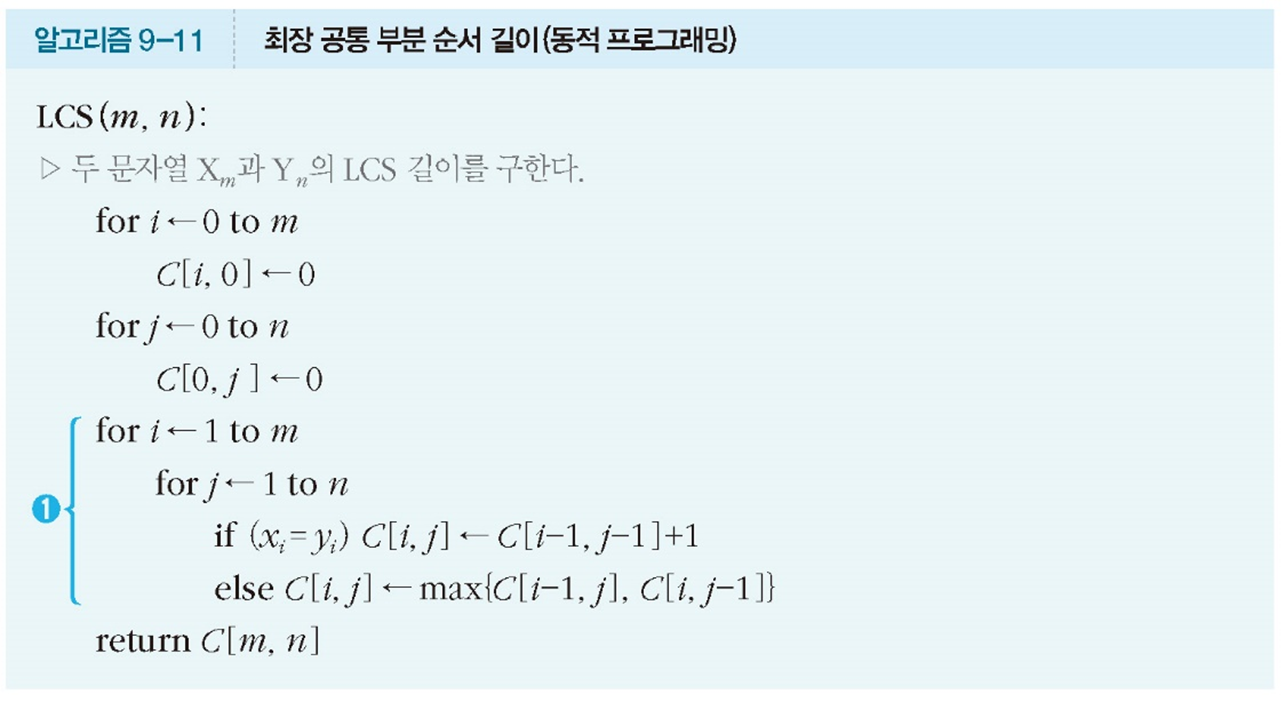

In [2]:
# 과제 2 - 1) 알고리즘 9-11을 최장 공통 부분 순서의 길이와 함께 최장 공통 부분 순서도 같이 구할 수 있도록 python 코드 작성하기

def longest_common_subsequence(X, Y):
    m = len(X)  # 첫 번째 문자열 X의 길이
    n = len(Y)  # 두 번째 문자열 Y의 길이

    # LCS의 길이를 저장하기 위한 테이블 생성 및 초기화
    lcs_table = [[0] * (n + 1) for _ in range(m + 1)]

    # LCS , 최장 공통 부분의 길이 계산
    for i in range(1, m + 1):  # 첫 번째 문자열의 각 문자에 대해
        for j in range(1, n + 1):  # 두 번째 문자열의 각 문자에 대해
            if X[i - 1] == Y[j - 1]:  # 만약 두 문자가 같다면
                lcs_table[i][j] = lcs_table[i - 1][j - 1] + 1  # 이전 좌상단 요소의 값에 1을 더한다
            else:  # 두 문자가 다르다면
                lcs_table[i][j] = max(lcs_table[i - 1][j], lcs_table[i][j - 1])  # 위나 왼쪽 값 중 큰 값을 선택한다

    # LCS 길이 출력
    print("최장 공통 부분 순서의 길이:", lcs_table[m][n]) # lcs_table[m][n]은 마지막 행과 열에 위치한 값이고, 이 값은 두 문자열 X와 Y의 최장 공통 부분 순서의 길이를 나타냄

    # LCS 순서 출력, 역추적을 통해 가장 최장 공통 부분 순서 찾기
    lcs = []
    i, j = m, n # i와 j는 각각 첫 번째 문자열(X)과 두 번째 문자열(Y)의 길이를 나타냄
    while i > 0 and j > 0:  # 역추적을 위한 반복문, 시작점부터 역추적
        if X[i - 1] == Y[j - 1]:  # 두 문자가 같으면
            lcs.append(X[i - 1])  # 해당 문자를 LCS에 추가하고
            i -= 1  # 좌상단 셀로 이동
            j -= 1  # 좌상단 셀로 이동
        elif lcs_table[i - 1][j] > lcs_table[i][j - 1]:  # 위쪽 값이 왼쪽 값보다 크면
            i -= 1  # 위로 이동
        else:  # 그렇지 않으면
            j -= 1  # 왼쪽으로 이동

    print("최장 공통 부분 순서:", ''.join(reversed(lcs))) # 역순으로 저장된 LCS를 reversed를 이용해 정상적인 순서로 출력

# 출력 예시
# 두 문자열 X와 Y의 LCS의 길이, 순서를 구한다
X = "AGGTAB"
Y = "GXTXAYB"
longest_common_subsequence(X, Y)

최장 공통 부분 순서의 길이: 4
최장 공통 부분 순서: GTAB


과제 2 - 2) 수업시간 외 동적프로그래밍의 여러가지 예제 알아보기


*   python 코드로 작성 및 주석 달기
*   단, 이때 주석은 1줄마다 달 것
*   예제의 예
    *   최장 회문 부분 문자 집합
    *   단조 증가 부분 수열 등
    *   그 외에도 다른 형태가 있는지 알아보고 코드로 작성



In [5]:
# 과제 2 - 2) 수업시간 외 동적프로그래밍의 여러가지 예제 알아보기

# 1. 최장 회문 부분 문자열 - 입력 문자열에서 최장 회문 부분 문자열 찾기, 시간 복잡도는 O(n^2)
def longest_palindromic_substring(s):
    n = len(s)  # 문자열의 길이를 저장
    dp = [[False] * n for _ in range(n)]  # 회문 여부를 저장하는 DP 테이블 생성
    max_length = 1  # 최장 회문 부분 문자열의 길이 초기값 설정
    start = 0  # 최장 회문 부분 문자열의 시작 인덱스 초기값 설정

    # 길이가 1인 문자열은 모두 회문이므로 초기화
    for i in range(n):
        dp[i][i] = True

    # 길이가 2인 회문 검사
    for i in range(n - 1):
        if s[i] == s[i + 1]:  # 인접한 두 문자가 같으면
            dp[i][i + 1] = True  # 회문 여부를 True로 설정
            max_length = 2  # 최장 회문 부분 문자열의 길이 갱신
            start = i  # 최장 회문 부분 문자열의 시작 인덱스 갱신

    # 길이가 3 이상인 회문 검사
    for length in range(3, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1  # 회문을 검사할 부분 문자열의 끝 인덱스
            if s[i] == s[j] and dp[i + 1][j - 1]:  # 양 끝 문자가 같고, 내부 문자열이 회문인 경우
                dp[i][j] = True  # 회문 여부를 True로 설정
                max_length = length  # 최장 회문 부분 문자열의 길이 갱신
                start = i  # 최장 회문 부분 문자열의 시작 인덱스 갱신

    return s[start:start + max_length]  # 최장 회문 부분 문자열 반환
    # 주어진 문자열의 길이에 따라, 가능한 모든 부분 문자열의 길이를 검사하여 최장 회문 부분 문자열을 찾는 방식

# 예시
s = "babad"
print("최장 회문 부분 문자열:", longest_palindromic_substring(s))  # "bab" 나 "aba"가 될 수 있음


최장 회문 부분 문자열: aba


In [6]:
# 2. 단조 증가 부분 수열
# 입력으로 주어진 배열에서 최장 증가 부분 수열의 길이를 찾기
def longest_increasing_subsequence(nums):
    n = len(nums)  # 배열의 길이 저장
    dp = [1] * n  # 각 요소가 포함된 증가 부분 수열의 최대 길이를 저장하는 테이블 초기화

    for i in range(1, n):  # 배열을 순회하면서, 각 요소마다
        for j in range(i):  # 현재 위치 이전의 모든 요소들에 대해
            if nums[i] > nums[j]:  # 현재 요소가 이전 요소보다 큰 경우
                dp[i] = max(dp[i], dp[j] + 1)  # 현재 요소를 포함한 증가 부분 수열의 길이 갱신

    return max(dp)  # 전체 배열에서 가장 긴 증가 부분 수열의 길이 반환

# 예시
nums = [10, 9, 2, 5, 3, 7, 101, 18]
print("최장 증가 부분 수열의 길이:", longest_increasing_subsequence(nums))

최장 증가 부분 수열의 길이: 4


In [7]:
# 3. 연속된 부분 배열의 최대 합
# 주어진 배열에서 연속된 부분 배열의 최대 합을 찾기
def max_subarray(nums):
    n = len(nums)  # 배열의 길이를 저장
    max_sum = float('-inf')  # 최대 합을 저장하는 변수를 음의 무한대로 초기화
    current_sum = 0  # 현재까지의 부분 배열 합을 저장하는 변수를 초기화

    for num in nums:  # 배열의 각 요소에 대해
        current_sum = max(num, current_sum + num)  # 현재 요소를 포함하는 새로운 부분 배열 합 계산
        max_sum = max(max_sum, current_sum)  # 최대 합 갱신

    return max_sum  # 최대 합 반환

# 예시
nums = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
print("연속된 부분 배열의 최대 합:", max_subarray(nums))  # 6

연속된 부분 배열의 최대 합: 6


In [14]:
# 4. 배낭 문제 (0/1 Knapsack Problem)
# 주어진 개수와 value, 그리고 배낭의 용량에 대해 최대 value를 계산
def knapsack(weights, values, capacity):
    n = len(weights)  # 물건의 개수를 저장
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]  # 테이블 초기화

    for i in range(1, n + 1):  # 각 물건에 대해,
        for w in range(1, capacity + 1):  # 배낭 용량 내에서
            if weights[i - 1] <= w:  # 현재 물건을 넣을 수 있는 경우
                dp[i][w] = max(values[i - 1] + dp[i - 1][w - weights[i - 1]], dp[i - 1][w])  # 물건을 넣었을 때와 안 넣었을 때 중 최대 value값 선택
            else:  # 현재 물건을 넣을 수 없는 경우
                dp[i][w] = dp[i - 1][w]  # 이전 상태를 그대로 가져옴

    return dp[n][capacity]  # 배낭에 담을 수 있는 최대 value값 반환

# 예시
weights = [1, 2, 3]
values = [6, 10, 12]
capacity = 5
print("최대 넣을 수 있는 용량:", knapsack(weights, values, capacity))  # 22

최대 넣을 수 있는 용량: 22


In [12]:
# 5. 편집 거리
# 두 단어 간의 편집 거리를 계산
def edit_distance(word1, word2):
    m, n = len(word1), len(word2)  # 각 단어의 길이 저장
    dp = [[0] * (n + 1) for _ in range(m + 1)]  # 테이블 초기화

    for i in range(m + 1):  # 첫 번째 단어의 모든 부분 문자열이 두 번째 단어의 어떤 부분 문자열에도 속하지 않는 경우
        dp[i][0] = i

    for j in range(n + 1):  # 두 번째 단어의 모든 부분 문자열이 첫 번째 단어의 어떤 부분 문자열에도 속하지 않는 경우
        dp[0][j] = j

    for i in range(1, m + 1):  # 첫 번째 단어의 모든 글자를 순회
        for j in range(1, n + 1):  # 두 번째 단어의 모든 글자를 순회
            if word1[i - 1] == word2[j - 1]:  # 현재 글자가 서로 같은 경우
                dp[i][j] = dp[i - 1][j - 1]  # 이전까지의 편집 거리를 그대로 가져옴
            else:  # 현재 글자가 서로 다른 경우
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])  # 대체, 삽입, 삭제 중 최소 편집 거리 선택

    return dp[m][n]  # 두 단어 간 최종 편집 거리 반환


# 예시
word1 = "horse"
word2 = "ros"
print("편집 거리:", edit_distance(word1, word2))  # 3

편집 거리: 3


In [15]:
# 6. 계단 오르기
# 주어진 계단 수에 대해 오를 수 있는 모든 방법의 수를 계산
def climb_stairs(n):
    if n == 1:  # 계단이 한 개인 경우
        return 1
    if n == 2:  # 계단이 두 개인 경우
        return 2

    dp = [0] * (n + 1)  # 계단의 수에 따른 오를 수 있는 경우의 수를 저장하는 테이블을 초기화
    dp[1] = 1  # 한 계단일 때의 경우의 수
    dp[2] = 2  # 두 계단일 때의 경우의 수

    for i in range(3, n + 1):  # 세 번째 계단부터 마지막 계단까지
        dp[i] = dp[i - 1] + dp[i - 2]  # 현재 계단을 오르는 방법의 수는 이전 두 계단을 오르는 방법의 수의 합

    return dp[n]  # 마지막 계단까지 오를 수 있는 경우의 수 반환

# 예시
n = 4
print("계단을 오르는 방법의 수:", climb_stairs(n))  # 5

계단을 오르는 방법의 수: 5
